In [30]:
# import required libraries
# import numpy as np
# from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import math
import PIL
from numpy import asarray
from os import listdir
from matplotlib import image
import numpy as np
from PIL import Image
import warnings
from numpy import save
import cv2
import os

In [31]:
# converting into npy and load all Ac images into directory
ac_list = []
for filename in listdir('./animal_crossing'):
    # load image
    img = cv2.imread('./animal_crossing/' + filename)
    small_img = cv2.resize(img, dsize=(100,100), interpolation=cv2.INTER_AREA)
#     img = keras.preprocessing.image.load_img('./animal_crossing/' + filename)
    # store loaded image
    ac_list.append(small_img)
#     np.savez('animal_crossing.npz', small_img)
#     print('> loaded %s %s' % (filename, small_img.shape))
    
np.save('animal_crossing.npy', ac_list)

# load all doom images in a directory

doom_list = []
for filename in listdir('./doom'):
    # load image
    img = cv2.imread('./doom/' + filename)
#     img = keras.preprocessing.image.load_img('./doom/' + filename)
    small_img = cv2.resize(img, dsize=(100,100), interpolation=cv2.INTER_AREA)
    # store loaded image
    doom_list.append(small_img)
#     print('> loaded %s %s' % (filename, img_data.shape))
    
np.save('doom.npy', doom_list)

In [32]:
# loading the data
animalcrossing_data = np.load('./animal_crossing.npy')
doom_data = np.load('./doom.npy')

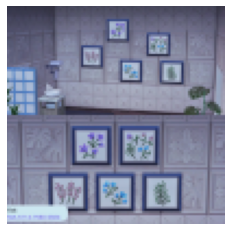

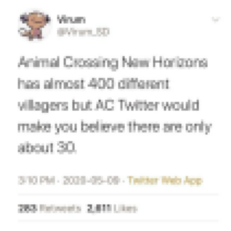

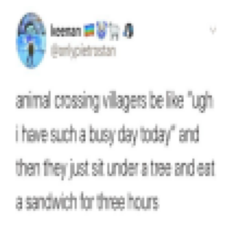

In [33]:
# understanding the data
def print_data(data):
    for line in data:
        print(line)
        print('----------------')


# cleaner printing
def print_drawing(drawing):
    plt.imshow(drawing)
    plt.axis('off')
    plt.show()

# print_data(animalcrossing_data)
    
for drawing in animalcrossing_data[:3]:
    print_drawing(drawing)
    


In [34]:
# randomizing the data
np.random.shuffle(animalcrossing_data)
np.random.shuffle(doom_data)

# splitting into test and train
train_percent = 0.8

animalcrossing_cutoff = math.floor(len(animalcrossing_data) * train_percent)
animalcrossing_trainX = animalcrossing_data[:animalcrossing_cutoff]
animalcrossing_trainY = np.tile([1,0,0,0], (len(animalcrossing_trainX),1))
animalcrossing_testX = animalcrossing_data[animalcrossing_cutoff:]
animalcrossing_testY = np.tile([1,0,0,0], (len(animalcrossing_testX),1))

doom_cutoff = math.floor(len(doom_data) * train_percent)
doom_trainX = doom_data[:doom_cutoff]
doom_trainY = np.tile([0,1,0,0], (len(doom_trainX),1))
doom_testX = doom_data[doom_cutoff:]
doom_testY = np.tile([0,1,0,0], (len(doom_testX),1))

# building the training and testing arrays
X_train = np.concatenate((animalcrossing_trainX, doom_trainX))
Y_train = np.concatenate((animalcrossing_trainX, doom_trainX))
X_test = np.concatenate((animalcrossing_testX, doom_testX))
Y_test = np.concatenate((animalcrossing_testY, doom_testY))

In [35]:
# normalize the X data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [36]:
# building out the model
model = keras.models.Sequential()

# adding the first hidden layer
model.add(layers.Dense(512, input_shape=(100,100,3)))
model.add(layers.Activation('relu'))                            
model.add(layers.Dropout(0.2))

# adding the second hidden layer
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

# adding the output layer
model.add(layers.Dense(3))
model.add(layers.Activation('softmax'))

In [37]:
# compiling the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# training the model
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/20
